# Descrição do Dataset

Nestre trabalho você irá trabalhar com o dataset California Housing Prices, um conjunto de anotações a respeito
de imóveis de diversos distritos da California (baseado em um censo de 1990) e seus preços médios de venda. As
anotações disponíveis são:

- Longitude;
- Latitude;
- Idade do imóvel;
- Número de cômodos;
- Número de quartos;
- População do distrito em que a casa está localizada;
- Número de imóveis familiares no distrito;
- Renda média do distrito;
- Proximidade com o oceano;
- Preço médio do imóvel (valor alvo que queremos prever)

In [1]:
#install.packages('gridExtra')

library(ggplot2)
library(IRdisplay)
library(gridExtra)

MSE <- function(a, b) {
    usable <- !(is.na(a) | is.na(b))
    sum((a[usable] - b[usable])**2) / sum(usable)
}

MAE <- function(a, b) {
    usable <- !(is.na(a) | is.na(b))
    mean(abs(a[usable] - b[usable]))
}

In [2]:
train.dataset <- read.csv("housePricing_trainSet.csv")
validation.dataset <- read.csv("housePricing_valSet.csv")
test.dataset <- read.csv("housePricing_testSet.csv")
head(validation.dataset)

longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
-116.24,33.73,14,2774,566,1530,505,3.0682,104100,INLAND
-121.77,37.24,12,10236,1878,5674,1816,4.7470,261100,<1H OCEAN
-118.63,34.11,35,3795,690,1521,653,5.8735,448100,<1H OCEAN
-118.35,34.22,19,9259,1653,3963,1595,5.9970,228700,<1H OCEAN
-117.13,32.98,5,2276,311,1158,317,6.4321,271900,<1H OCEAN
-117.65,34.07,35,2501,651,1182,591,1.4464,113200,INLAND


# Tarefas

Para as tarefas deste trabalho, você podem utilizar a função lm para fazer a regressão linear como fizemos em sala.

## Inspecione os dados.

- Quantos exemplos você tem?
  - 12384 para treino e 4128 para validação
- Como você irá lidar com as features discretas?
  - A única feature discreta é `ocean_proximity`. A forma mais comum é criando novas features binárias que indicam quando a feature discreta possui cada um dos valores possiveis. A função `lm` faz isso automagicamente.
  - Em um dos casos, eu faço uma regressão com features binárias para encontrar uma relação entre `ocean_proximity` e `median_house_value`, e uso esta nova feature. O resultado é meh.
- Há exemplos com features sem anotações? Como você lidaria com isso?
  - Sim, aproximadamente 1% das observações possuem NA em `total_bedrooms`.
  - Não é ideal, mas vou preencher estas lacunas com o valor médio da coluna observado no conjunto de treinamento.

In [3]:
train.dataset[apply(is.na(train.dataset), 1, any),]
validation.dataset[apply(is.na(validation.dataset), 1, any),]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
82,-120.61,37.36,16,638,NA,380,132,1.9135,87500,INLAND
212,-117.31,34.25,29,4610,NA,1569,592,2.7663,97900,INLAND
350,-118.30,33.73,42,1731,NA,866,403,2.7451,255400,NEAR OCEAN
864,-121.88,37.40,9,6751,NA,4240,1438,5.3400,257400,<1H OCEAN
898,-122.08,37.88,26,2947,NA,825,626,2.9330,85000,NEAR BAY
946,-122.45,37.77,52,2602,NA,1330,647,3.5435,278600,NEAR BAY
959,-121.08,39.22,30,2188,NA,1033,437,2.1419,105200,INLAND
972,-118.02,33.89,36,1375,NA,670,221,5.0839,198200,<1H OCEAN
1029,-119.73,34.44,38,1729,NA,801,395,3.1364,357500,NEAR OCEAN
1099,-118.56,34.20,35,2273,NA,1431,403,4.0789,196700,<1H OCEAN


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
98,-118.36,34.05,45,2283,NA,1093,475,2.5658,252000,<1H OCEAN
217,-117.91,34.05,35,3189,NA,1727,500,5.0758,211100,<1H OCEAN
238,-118.55,34.19,18,5862,NA,3161,1280,3.1106,170600,<1H OCEAN
333,-118.30,34.07,18,3759,NA,3296,1462,2.2708,175000,<1H OCEAN
479,-118.75,34.29,17,5512,NA,2734,814,6.6073,258100,<1H OCEAN
610,-117.02,32.78,31,2567,NA,1198,499,3.4659,163000,<1H OCEAN
620,-118.08,33.92,38,1335,NA,1011,269,3.6908,157500,<1H OCEAN
625,-121.89,37.44,8,2534,NA,1527,364,7.8532,422800,<1H OCEAN
652,-117.30,34.05,6,2155,NA,1039,391,1.6675,95800,INLAND
694,-118.09,33.89,42,991,NA,717,219,4.0926,164400,<1H OCEAN


# Normalize os dados

Normalização será feito separadamente em cada teste

# Baseline: Linear em todas as variáveis

In [4]:
as.transform <- function(transform, train) {
    if (is.function(transform)) {
        transform
    
    } else if (is.character(transform)) {
        function(df) {
            df[[transform]]
        }
        
    } else if (inherits(transform, "formula")) {
        regression <- lm(formula = transform, data = train, na.action=na.exclude)
        function(df) {
            predict(regression, df)
        }
        
    } else if (is.list(transform)) {
        transform <- transform$train(train)
    }
}

normalize <- function(transform, na_to_mean = T) {
    list(train = function(train) {
        t <- as.transform(transform, train)
        values <- t(train)
        m <- mean(values, na.rm = T)
        s <- sd(values, na.rm = T)
        function(df) {
            ret <- (t(df) - m) / s
            if (na_to_mean) {
                ret <- ifelse(is.na(ret), m, ret)
            }
            ret
        }
    })
}

evaluate.result <- function(title, subtitle, predicted, expected, predict.mse = F) {
    df.eval <- data.frame(Predicted = predicted, Expected = expected)
    linreg <- lm(Expected ~ Predicted, df.eval)
    r2 <- summary(linreg)$r.squared
    if (predict.mse) {
        mse <- MSE(expected, predicted)
        mae <- MAE(expected, predicted)
    } else {
        mse <- MSE(expected, predict(linreg, df.eval))
        mae <- MAE(expected, predict(linreg, df.eval))
    }
    
    p1 <- ggplot(data=df.eval, aes(x=Expected, y=Predicted))
    #p1 <- p1 + stat_density2d(aes(alpha=..level..), geom="polygon")
    p1 <- p1 + geom_point(size=.02)
    #p1 <- p1 + ggtitle(sprintf("%s: R² = %.3f, √MSE=%.0f, MSE=%.0f", title, r2, sqrt(mse), mse))
    p1 <- p1 + labs(
        title = title,
        subtitle = subtitle,
        caption=sprintf("R² = %.3f, MAE=%.0f, √MSE=%.0f", r2, mae, sqrt(mse)))
    p1 <- p1 + scale_x_continuous(limits = c(0, 600e3))
    p1 <- p1 + scale_y_continuous(limits = c(0, 600e3))

    p1
}

test.formula <- function(title, ...) {
    transforms = list(...)
    df.train       = data.frame(train.dataset)
    df.validation  = data.frame(validation.dataset)
    df.test        =  data.frame(test.dataset)
    
    for (name in names(transforms)) {
        transform <- as.transform(transforms[[name]], df.train)
        df.train[[name]]      <- transform(df.train)
        df.validation[[name]] <- transform(df.validation)
        df.test[[name]] <- transform(df.test)
    }
    
    
    p1 <- evaluate.result(title, 'Train', df.train[[name]], df.train$median_house_value)
    p2 <- evaluate.result(title, 'Validation', df.validation[[name]], df.validation$median_house_value)
    p3 <- evaluate.result(title, 'Test', df.test[[name]], df.test$median_house_value)

    options(repr.plot.width=10, repr.plot.height=3)
    grid.arrange(p1, p2, p3, ncol=3)    
}

Warning message in predict.lm(linreg, df.eval):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(linreg, df.eval):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(linreg, df.eval):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(linreg, df.eval):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(linreg, df.eval):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(linreg, df.eval):
“prediction from a rank-deficient fit may be misleading”Warning message:
“Removed 64 rows containing missing values (geom_point).”Warning message:
“Removed 22 rows containing missing values (geom_point).”Warning message:
“Removed 21 rows containing missing values (geom_point).”

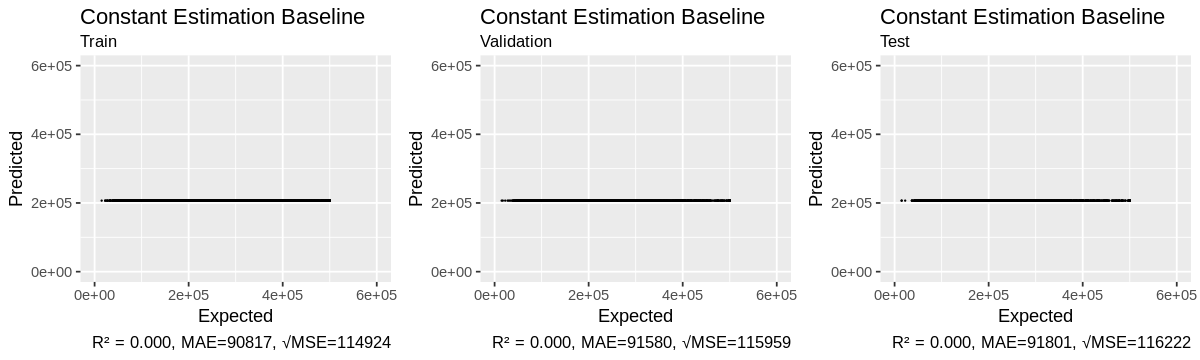

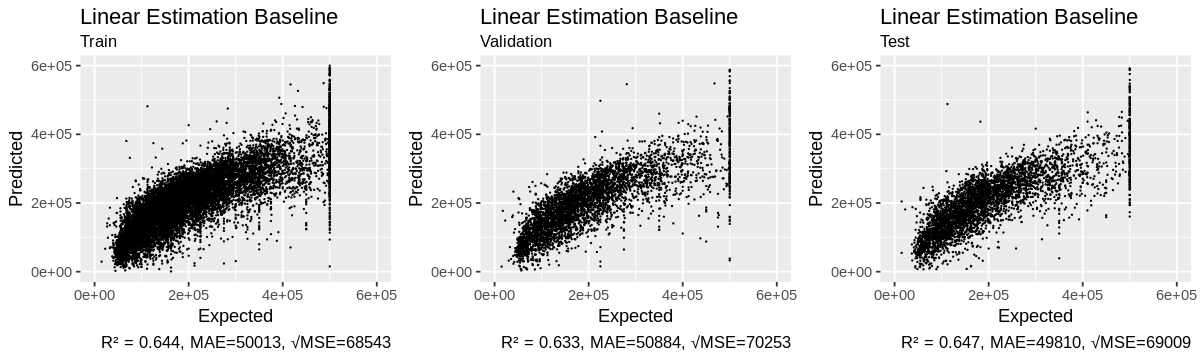

In [5]:
test.formula(
    "Constant Estimation Baseline",
    linear_estimate = median_house_value ~ 1
)

test.formula(
    "Linear Estimation Baseline",
    longitude = normalize('longitude'),
    latitude = normalize('latitude'),
    housing_median_age = normalize('housing_median_age'),
    total_rooms = normalize('total_rooms'),
    total_bedrooms = normalize('total_bedrooms'),
    population = normalize('population'),
    households = normalize('households'),
    median_income = normalize('median_income'),
    linear_estimate = median_house_value ~ ocean_proximity + longitude + latitude + housing_median_age + total_rooms + total_bedrooms + population + households + median_income
)

# Combinação de Features existentes

## Relação de Localidade com preço do imóvel

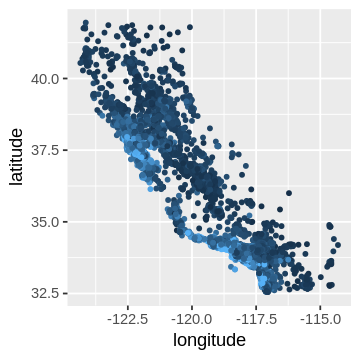

In [6]:
options(repr.plot.width=3, repr.plot.height=3)

n <- nrow(train.dataset)
p <- ggplot(train.dataset, aes(x = longitude, y = latitude, color = median_house_value))
p <- p + theme(legend.position="none")
p + geom_point(size=1)

O preço parece estar diretamente relacionado à distancia ao ao.

Somado ao fato da California ser razoavelmente linear, deve dar uma aproximação inicial aceitável.

Warning message:
“Removed 87 rows containing missing values (geom_point).”Warning message:
“Removed 33 rows containing missing values (geom_point).”Warning message:
“Removed 24 rows containing missing values (geom_point).”

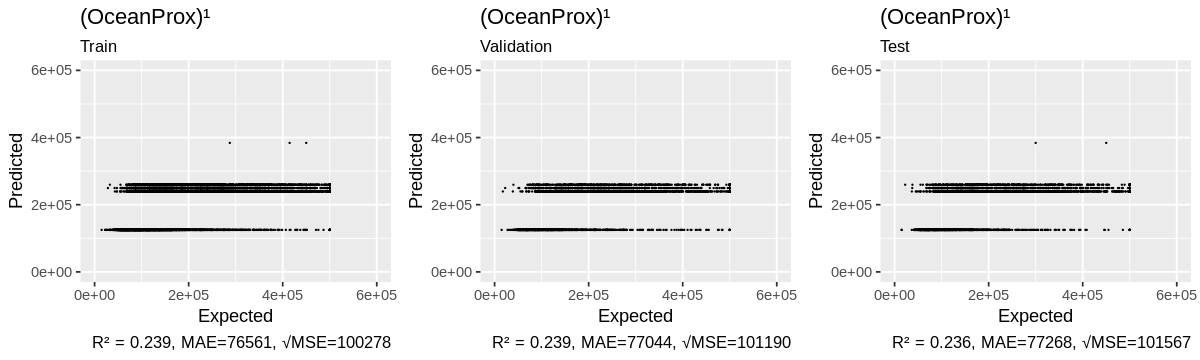

Warning message:
“Removed 85 rows containing missing values (geom_point).”Warning message:
“Removed 31 rows containing missing values (geom_point).”Warning message:
“Removed 25 rows containing missing values (geom_point).”

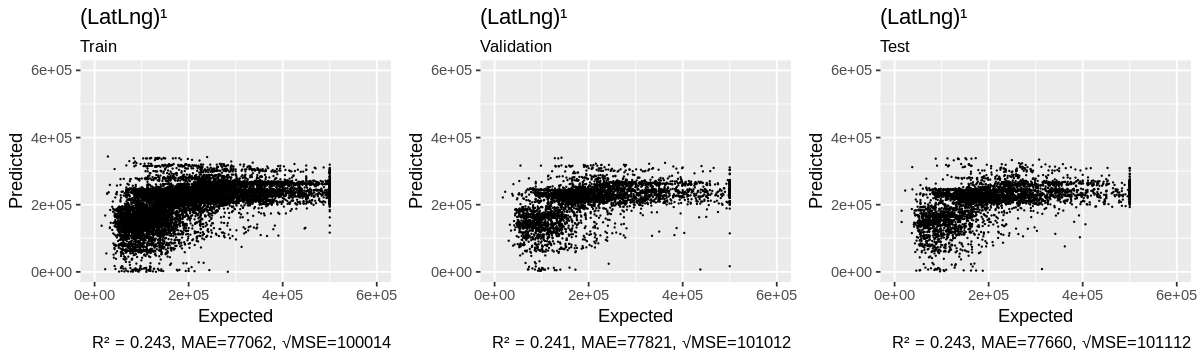

Warning message:
“Removed 85 rows containing missing values (geom_point).”Warning message:
“Removed 31 rows containing missing values (geom_point).”Warning message:
“Removed 25 rows containing missing values (geom_point).”

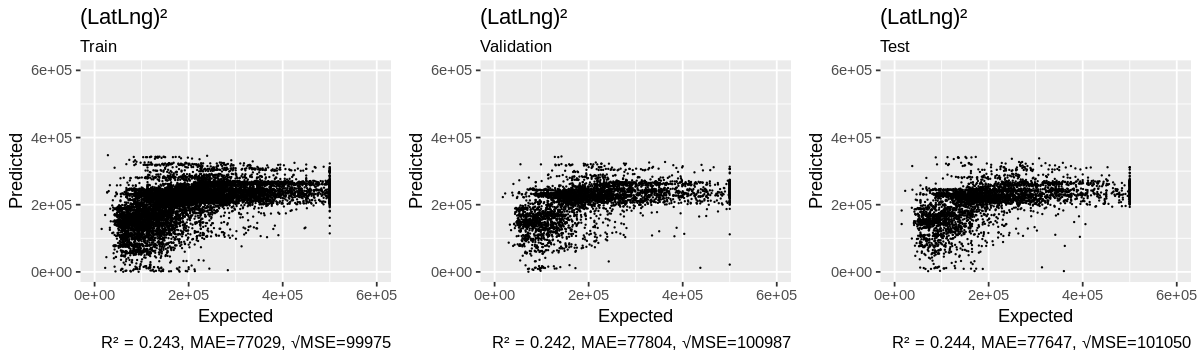

Warning message:
“Removed 11 rows containing missing values (geom_point).”Warning message:
“Removed 3 rows containing missing values (geom_point).”Warning message:
“Removed 3 rows containing missing values (geom_point).”

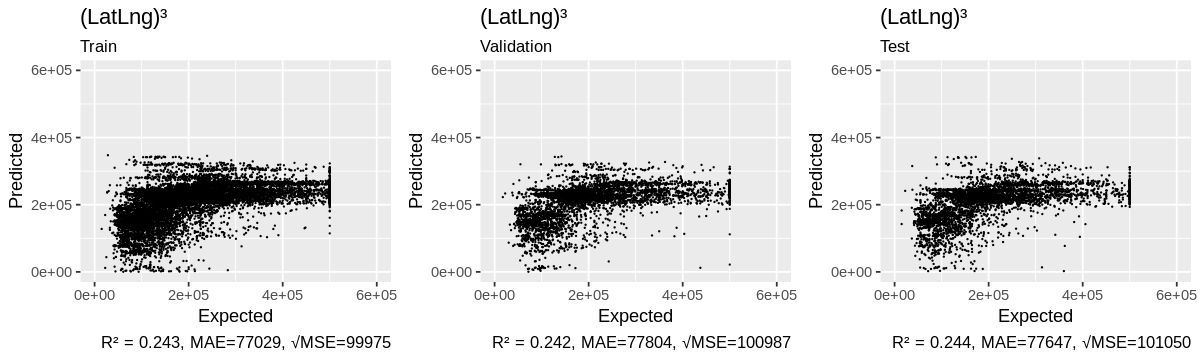

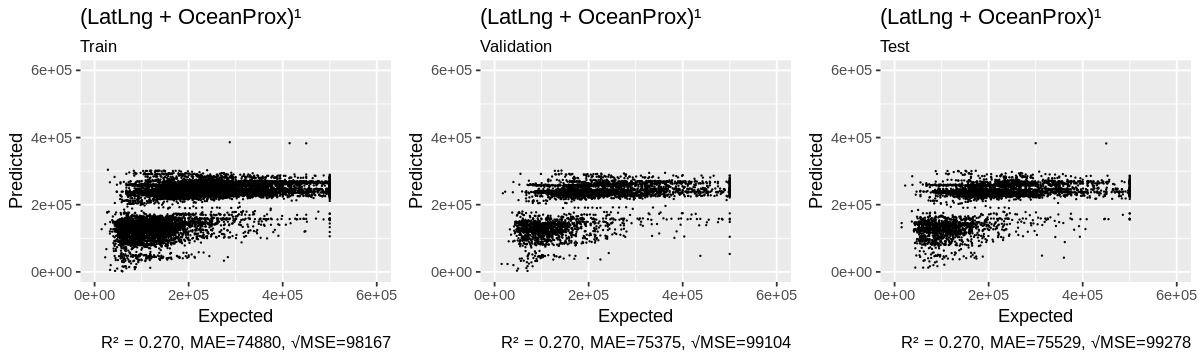

Warning message in predict.lm(regression, df):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(regression, df):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(regression, df):
“prediction from a rank-deficient fit may be misleading”

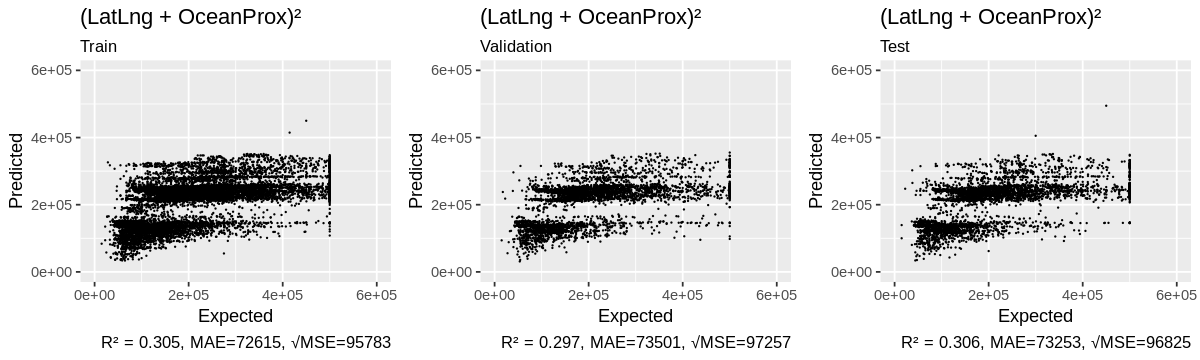

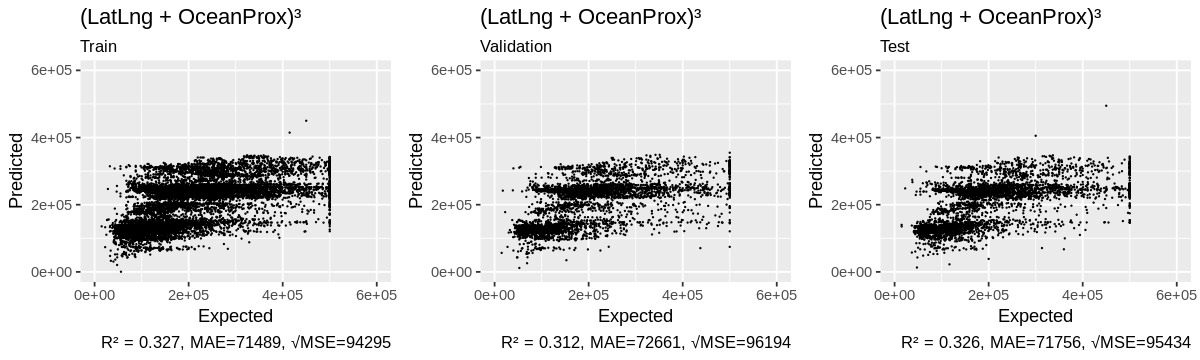

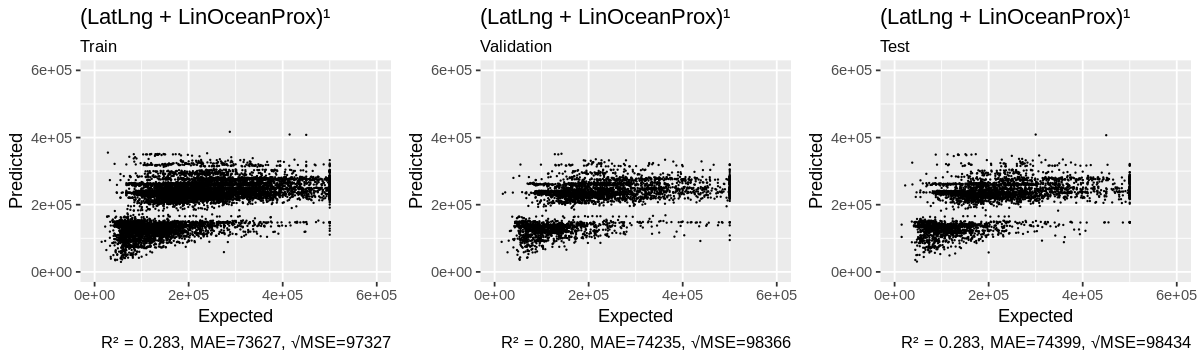

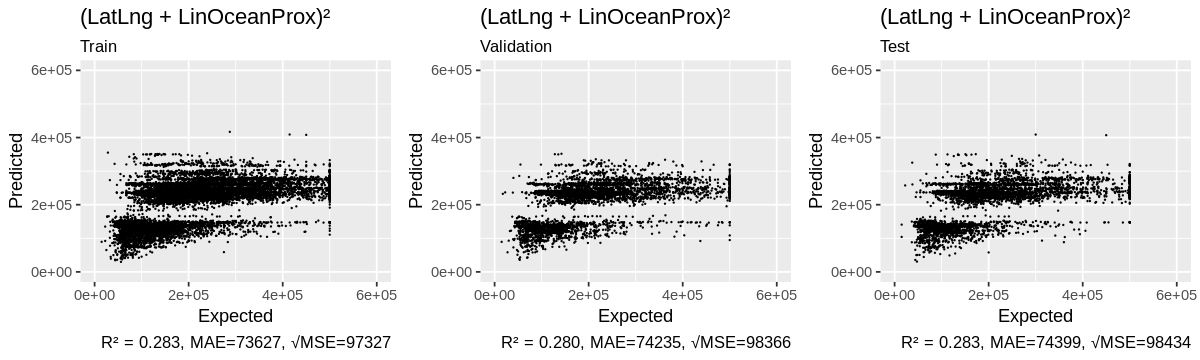

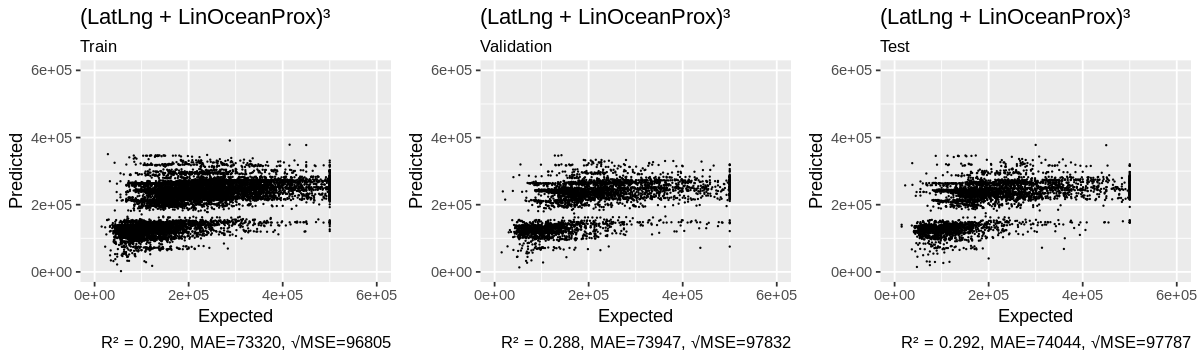

In [7]:
# Vamos explorar modelos que usam apenas a Localização

test.formula(
    "(OceanProx)¹",
    location_estimate = median_house_value ~ ocean_proximity
)

test.formula(
    "(LatLng)¹",
    longitude = normalize('longitude'),
    latitude = normalize('latitude'),
    location_estimate = median_house_value ~ longitude + latitude
)

test.formula(
    "(LatLng)²",
    longitude = normalize('longitude'),
    latitude = normalize('latitude'),
    location_estimate = median_house_value ~ (longitude + latitude) ^ 2
)

test.formula(
    "(LatLng)³",
    longitude = normalize('longitude'),
    latitude = normalize('latitude'),
    location_estimate = median_house_value ~ (longitude + latitude) ^ 3
)

test.formula(
    "(LatLng + OceanProx)¹",
    longitude = normalize('longitude'),
    latitude = normalize('latitude'),
    location_estimate = median_house_value ~ ocean_proximity + longitude + latitude
)

test.formula(
    "(LatLng + OceanProx)²",
    longitude = normalize('longitude'),
    latitude = normalize('latitude'),
    location_estimate = median_house_value ~ (ocean_proximity + longitude + latitude) ^ 2
)

test.formula(
    "(LatLng + OceanProx)³",
    longitude = normalize('longitude'),
    latitude = normalize('latitude'),
    location_estimate = median_house_value ~ (ocean_proximity + longitude + latitude) ^ 3
)

test.formula(
    "(LatLng + LinOceanProx)¹",
    longitude = normalize('longitude'),
    latitude = normalize('latitude'),
    ocean_proximity_estimate = normalize(median_house_value ~ ocean_proximity),
    location_estimate = median_house_value ~ (ocean_proximity_estimate + longitude + latitude) ^ 2
)

test.formula(
    "(LatLng + LinOceanProx)²",
    longitude = normalize('longitude'),
    latitude = normalize('latitude'),
    ocean_proximity_estimate = normalize(median_house_value ~ ocean_proximity),
    location_estimate = median_house_value ~ (ocean_proximity_estimate + longitude + latitude) ^ 2
)

test.formula(
    "(LatLng + LinOceanProx)³",
    longitude = normalize('longitude'),
    latitude = normalize('latitude'),
    ocean_proximity_estimate = normalize(median_house_value ~ ocean_proximity),
    location_estimate = median_house_value ~ (ocean_proximity_estimate + longitude + latitude) ^ 3
)


## Relação de Indicadores Demográficos com preço do imóvel

Testanda cada indicador demográfico separadamente, nas versões "total", "por pessoa" e "por casa"

Warning message:
“Removed 41 rows containing missing values (geom_point).”Warning message:
“Removed 17 rows containing missing values (geom_point).”Warning message:
“Removed 15 rows containing missing values (geom_point).”

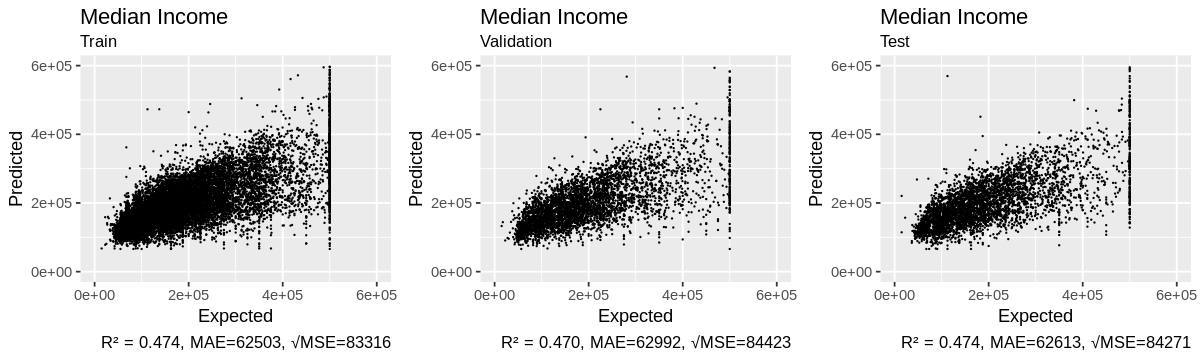

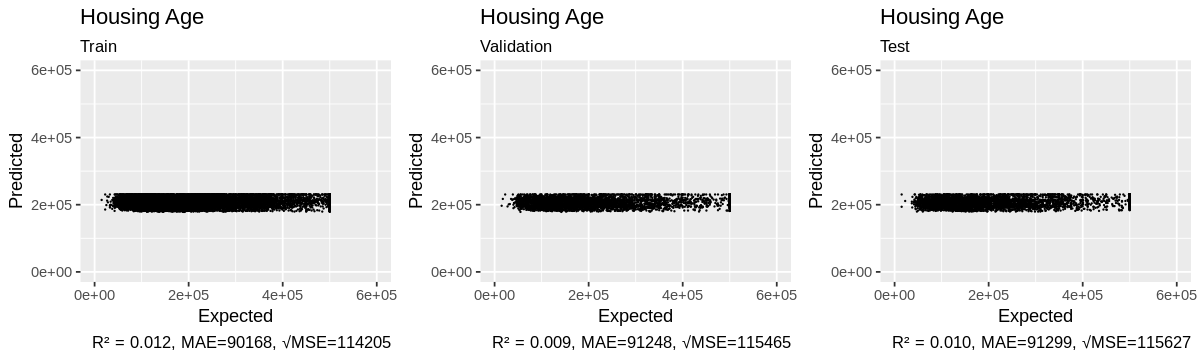

Warning message:
“Removed 7 rows containing missing values (geom_point).”Warning message:
“Removed 3 rows containing missing values (geom_point).”Warning message:
“Removed 3 rows containing missing values (geom_point).”

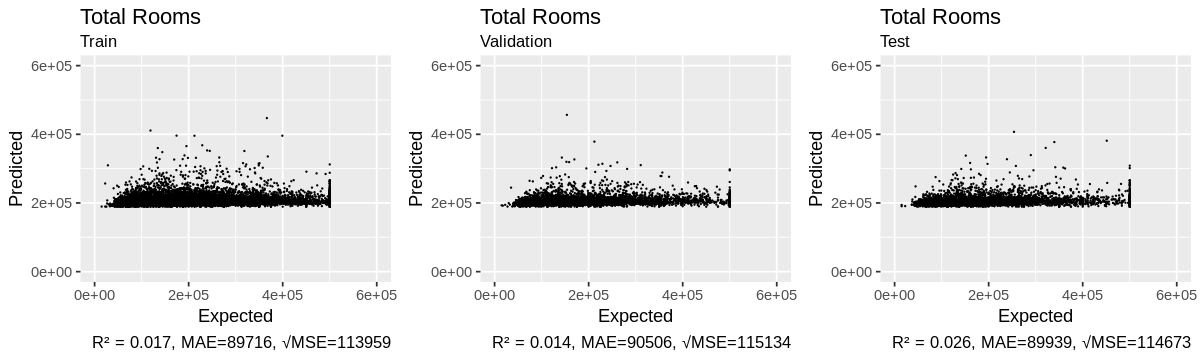

Warning message:
“Removed 4 rows containing missing values (geom_point).”Warning message:
“Removed 2 rows containing missing values (geom_point).”Warning message:
“Removed 2 rows containing missing values (geom_point).”

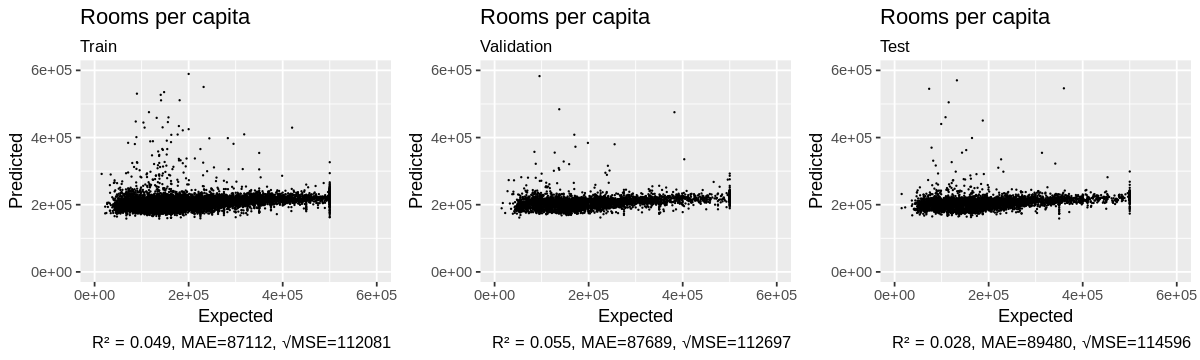

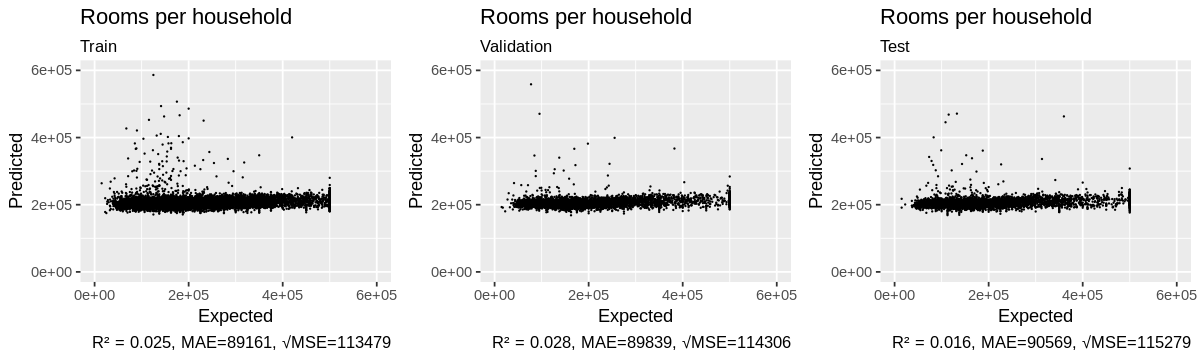

Warning message:
“Removed 1 rows containing missing values (geom_point).”

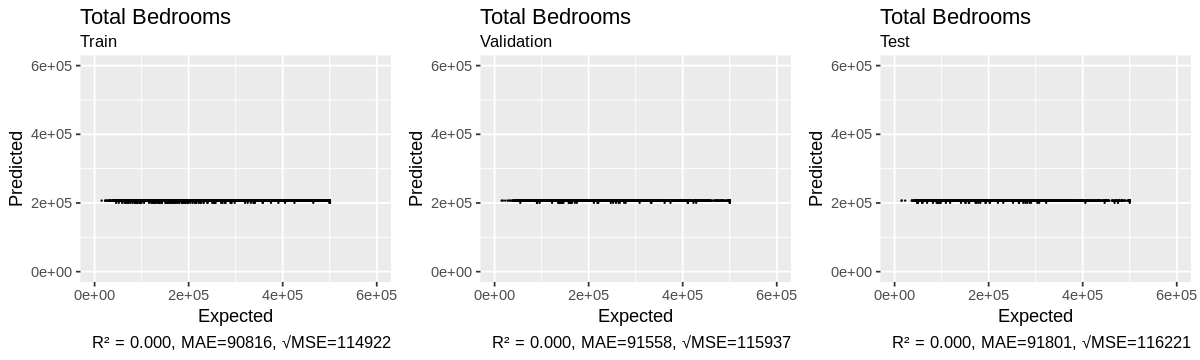

Warning message:
“Removed 4 rows containing missing values (geom_point).”Warning message:
“Removed 2 rows containing missing values (geom_point).”Warning message:
“Removed 2 rows containing missing values (geom_point).”

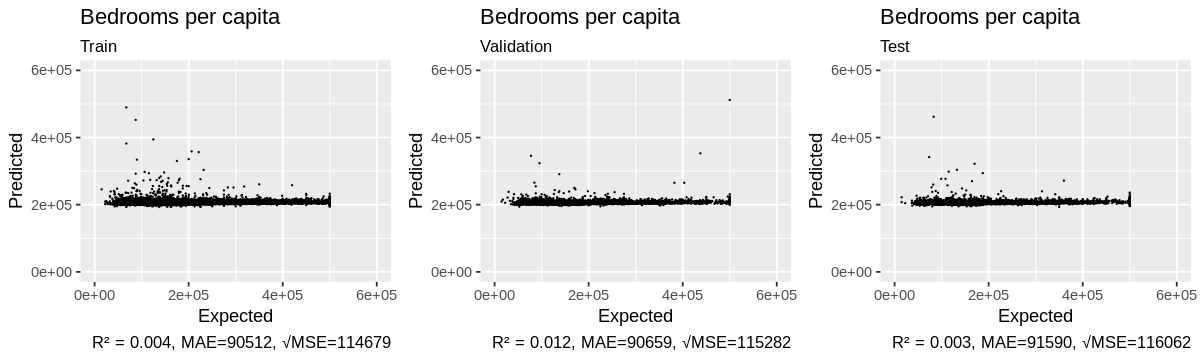

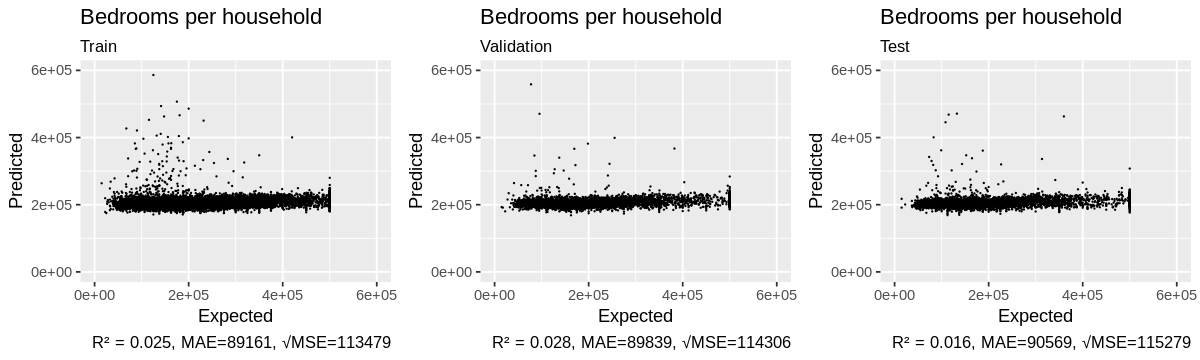

Warning message:
“Removed 1 rows containing missing values (geom_point).”

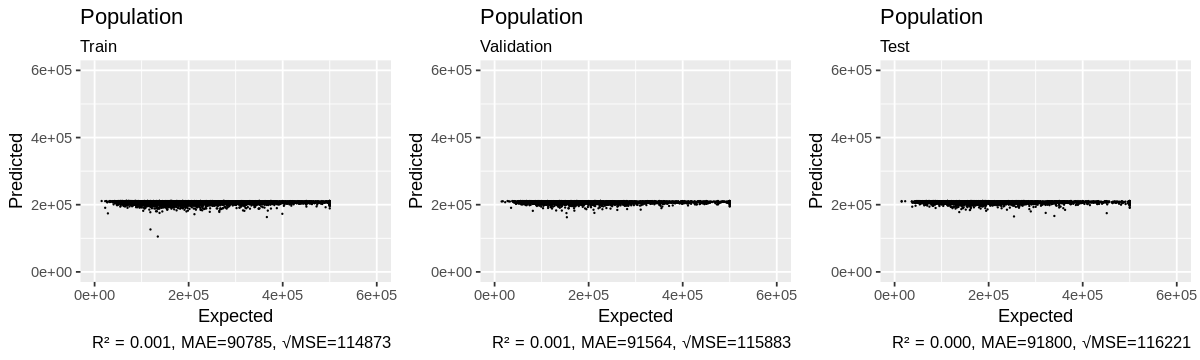

Warning message:
“Removed 1 rows containing missing values (geom_point).”

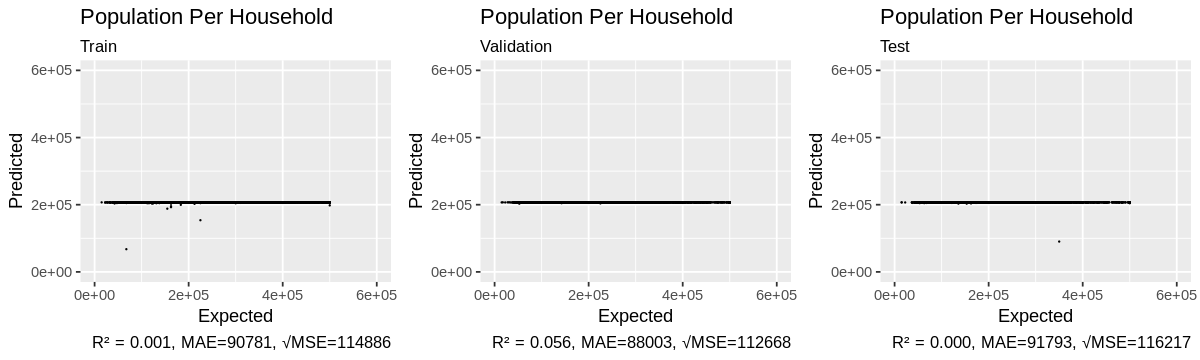

Warning message:
“Removed 1 rows containing missing values (geom_point).”

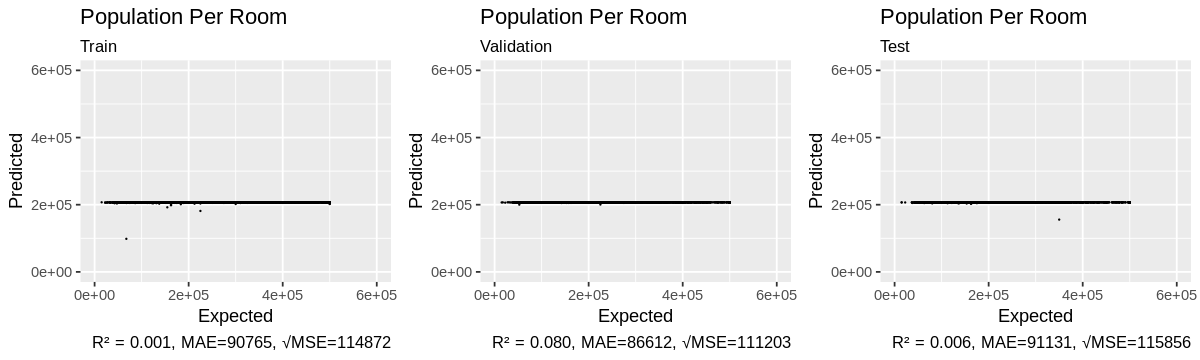

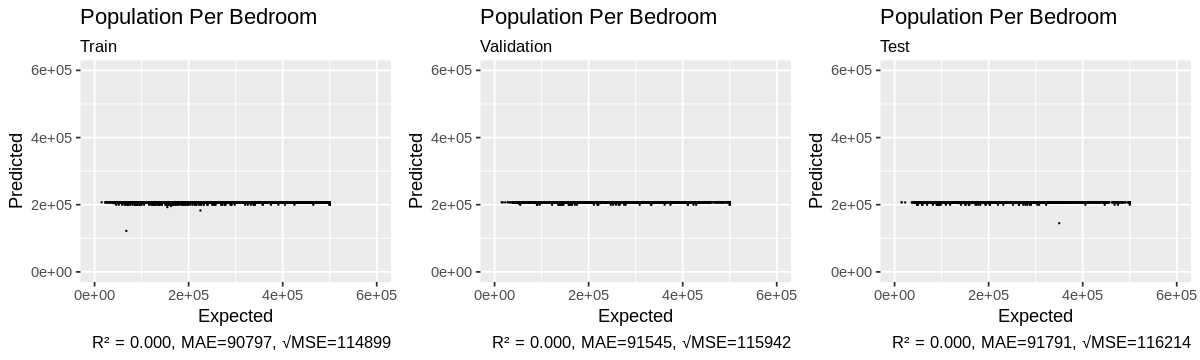

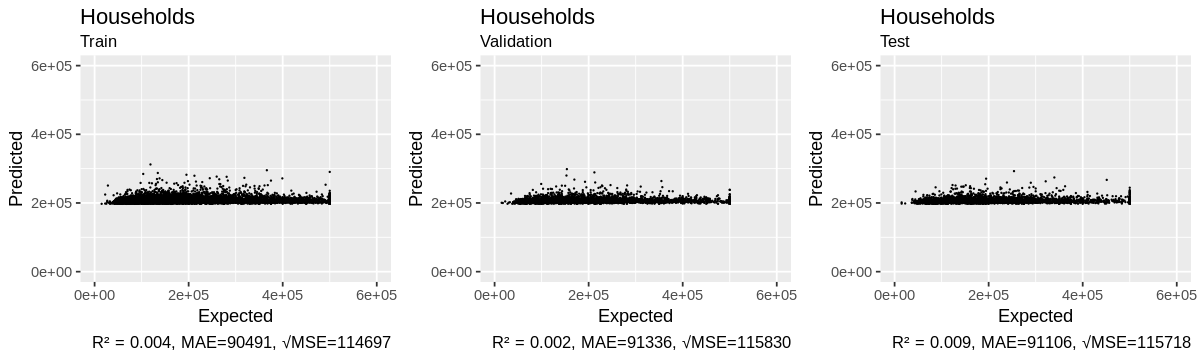

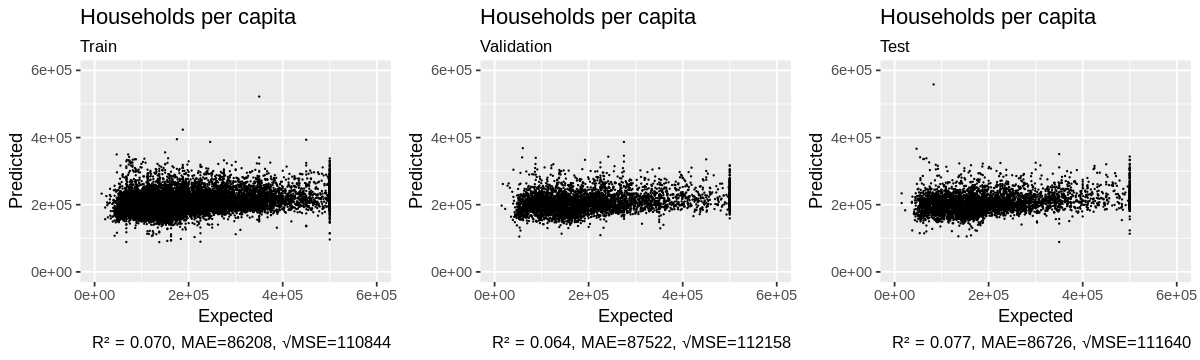

In [8]:
# Lets try the demographic indicators, both in total, per-household and per-capita

test.formula(
    "Median Income",
    median_income = normalize('median_income'),
    final_estimate = median_house_value ~ median_income^3
)

test.formula(
    "Housing Age",
    housing_median_age = normalize('housing_median_age'),
    final_estimate = median_house_value ~ housing_median_age^3
)

test.formula(
    "Total Rooms",
    total_rooms = normalize('total_rooms'),
    final_estimate = median_house_value ~ total_rooms^3
)

test.formula(
    "Rooms per capita",
    rooms_per_capita = normalize(function(df) {df$total_rooms / df$population}),
    final_estimate = median_house_value ~ rooms_per_capita^3
)

test.formula(
    "Rooms per household",
    rooms_per_household = normalize(function(df) {df$total_rooms / df$households}),
    final_estimate = median_house_value ~ rooms_per_household^3
)

test.formula(
    "Total Bedrooms",
    total_bedrooms = normalize('total_bedrooms'),
    final_estimate = median_house_value ~ total_bedrooms^3
)

test.formula(
    "Bedrooms per capita",
    bedrooms_per_capita = normalize(function(df) {df$total_bedrooms / df$population}),
    final_estimate = median_house_value ~ bedrooms_per_capita^3
)

test.formula(
    "Bedrooms per household",
    bedrooms_per_household = normalize(function(df) {df$total_rooms / df$households}),
    final_estimate = median_house_value ~ bedrooms_per_household^3
)

test.formula(
    "Population",
    population = normalize('population'),
    final_estimate = median_house_value ~ population^3
)

test.formula(
    "Population Per Household",
    population_per_household = normalize(function(df) {df$population / df$households}),
    final_estimate = median_house_value ~ population_per_household^3
)

test.formula(
    "Population Per Room",
    population_per_room = normalize(function(df) {df$population / df$total_rooms}),
    final_estimate = median_house_value ~ population_per_room^3
)

test.formula(
    "Population Per Bedroom",
    population_per_bedroom = normalize(function(df) {df$population / df$total_bedrooms}),
    final_estimate = median_house_value ~ population_per_bedroom^3
)

test.formula(
    "Households",
    households = normalize('households'),
    final_estimate = median_house_value ~ households^3
)

test.formula(
    "Households per capita",
    households_per_capita = normalize(function(df) {df$households / df$population}),
    final_estimate = median_house_value ~ households_per_capita^3
)

## Relação de Localidade e Renda Média com preço do imóvel

Pelo passo anterior:
- A localidade é muito importante para determinar o preço
- Dos indicadores demográficos, apenas a renda média é significativa para determinar o preço

Vamos combina-los!

Warning message:
“Removed 46 rows containing missing values (geom_point).”Warning message:
“Removed 19 rows containing missing values (geom_point).”Warning message:
“Removed 15 rows containing missing values (geom_point).”Warning message in predict.lm(regression, df):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(regression, df):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(regression, df):
“prediction from a rank-deficient fit may be misleading”Warning message:
“Removed 40 rows containing missing values (geom_point).”Warning message:
“Removed 19 rows containing missing values (geom_point).”Warning message:
“Removed 14 rows containing missing values (geom_point).”

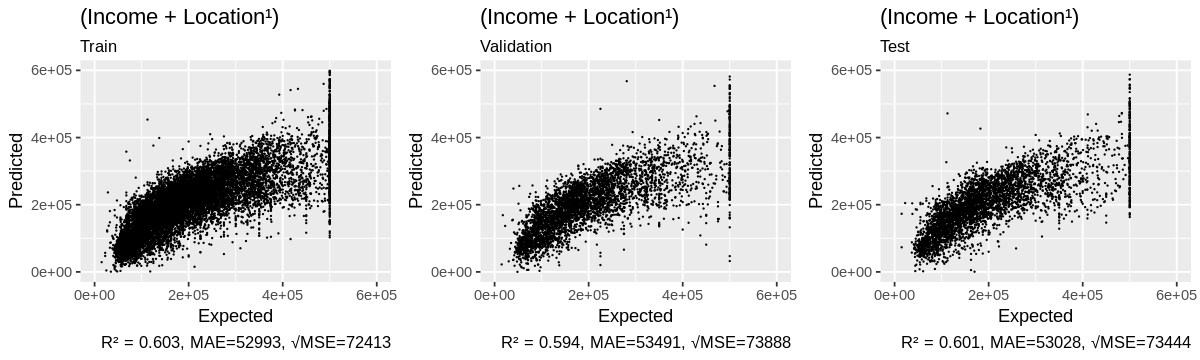

Warning message in predict.lm(regression, df):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(regression, df):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(regression, df):
“prediction from a rank-deficient fit may be misleading”Warning message:
“Removed 33 rows containing missing values (geom_point).”Warning message:
“Removed 15 rows containing missing values (geom_point).”Warning message:
“Removed 13 rows containing missing values (geom_point).”

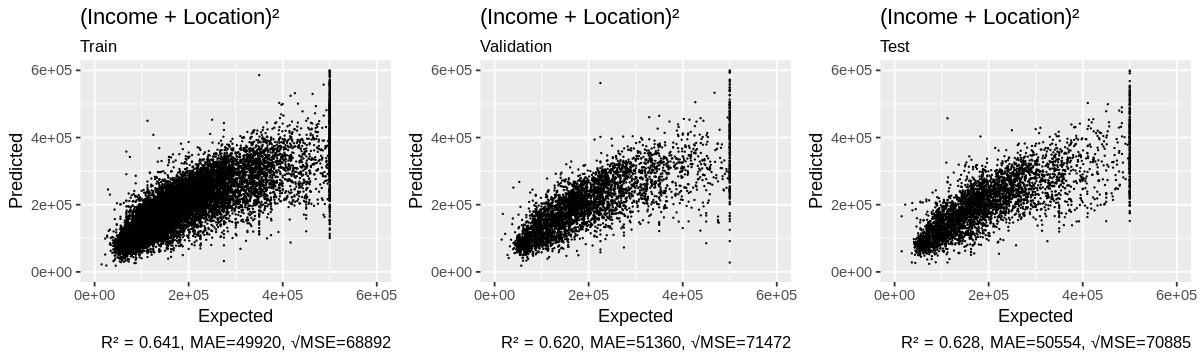

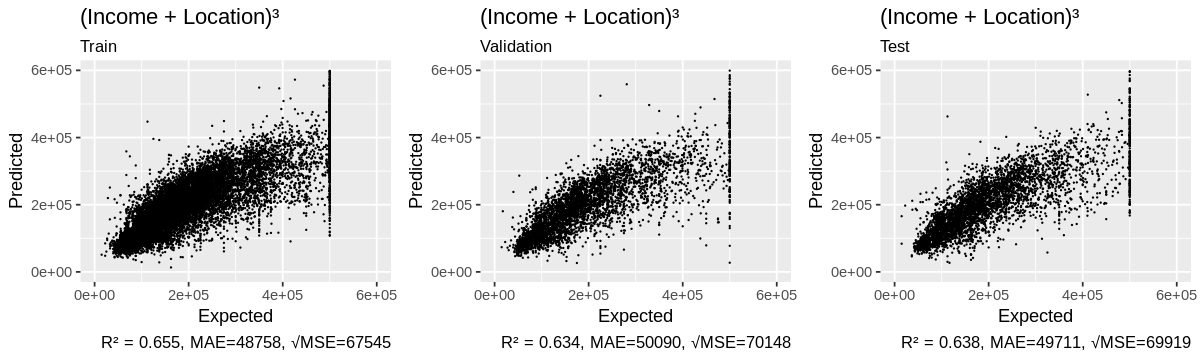

In [9]:
test.formula(
    "(Income + Location¹)",
    longitude = normalize('longitude'),
    latitude = normalize('latitude'),
    median_income = normalize('median_income'),
    final_estimate = median_house_value ~ (ocean_proximity + longitude + latitude + median_income)
)

test.formula(
    "(Income + Location)²",
    longitude = normalize('longitude'),
    latitude = normalize('latitude'),
    median_income = normalize('median_income'),
    final_estimate = median_house_value ~ (ocean_proximity + longitude + latitude + median_income) ^ 2
)

test.formula(
    "(Income + Location)³",
    longitude = normalize('longitude'),
    latitude = normalize('latitude'),
    median_income = normalize('median_income'),
    final_estimate = median_house_value ~ (ocean_proximity + longitude + latitude + median_income) ^ 3
)

## Relação entre Localidade e Principais Indicadores Demográficos com preço do imóvel

A importância da localidade e renda média são dominantes, porém estas dimensões também possuem influência significativa
- Salas per capita
- Casas per capita
- Quartos por casa
- População por sala

Warning message:
“Removed 57 rows containing missing values (geom_point).”Warning message:
“Removed 20 rows containing missing values (geom_point).”Warning message:
“Removed 23 rows containing missing values (geom_point).”Warning message in predict.lm(regression, df):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(regression, df):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(regression, df):
“prediction from a rank-deficient fit may be misleading”Warning message:
“Removed 39 rows containing missing values (geom_point).”Warning message:
“Removed 21 rows containing missing values (geom_point).”Warning message:
“Removed 14 rows containing missing values (geom_point).”

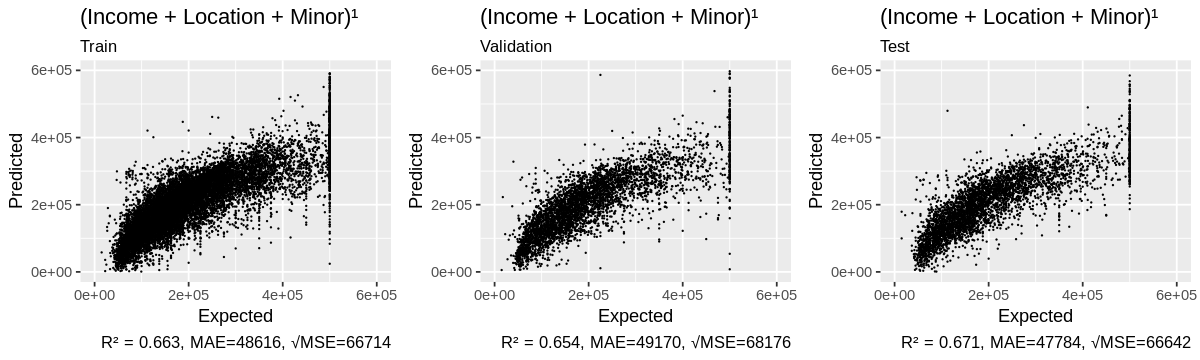

Warning message in predict.lm(regression, df):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(regression, df):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(regression, df):
“prediction from a rank-deficient fit may be misleading”Warning message:
“Removed 31 rows containing missing values (geom_point).”Warning message:
“Removed 20 rows containing missing values (geom_point).”Warning message:
“Removed 12 rows containing missing values (geom_point).”

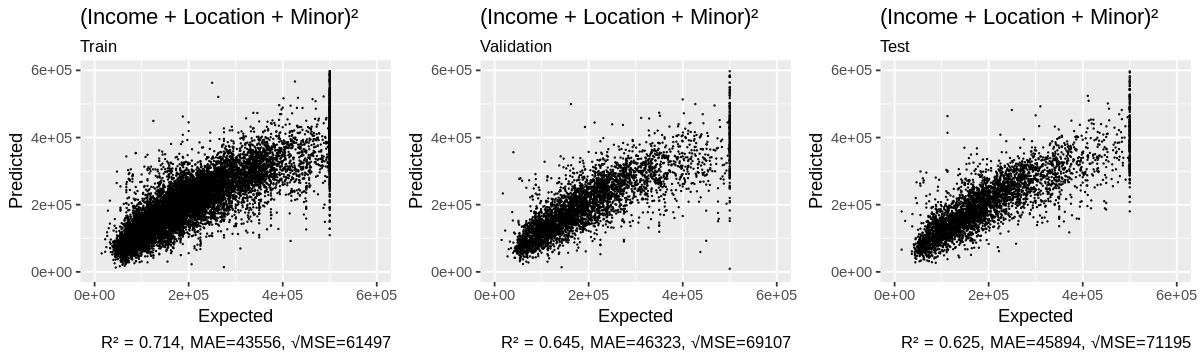

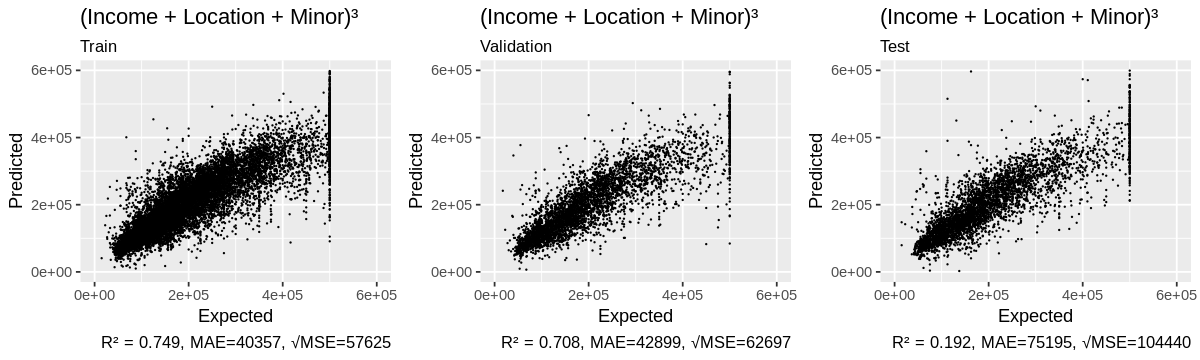

In [10]:
test.formula(
    "(Income + Location + Minor)¹",
    longitude = normalize('longitude'),
    latitude = normalize('latitude'),
    
    rooms_per_capita = normalize(function(df) {df$total_rooms / df$population}),
    bedrooms_per_household = normalize(function(df) {df$total_rooms / df$households}),
    population_per_room = normalize(function(df) {df$population / df$total_rooms}),
    households_per_capita = normalize(function(df) {df$households / df$population}),
    median_income = normalize('median_income'),
    
    final_estimate = median_house_value ~ (ocean_proximity + longitude + latitude + median_income + rooms_per_capita + bedrooms_per_household + population_per_room + households_per_capita)
)

test.formula(
    "(Income + Location + Minor)²",
    longitude = normalize('longitude'),
    latitude = normalize('latitude'),
    
    rooms_per_capita = normalize(function(df) {df$total_rooms / df$population}),
    bedrooms_per_household = normalize(function(df) {df$total_rooms / df$households}),
    population_per_room = normalize(function(df) {df$population / df$total_rooms}),
    households_per_capita = normalize(function(df) {df$households / df$population}),
    median_income = normalize('median_income'),
    
    final_estimate = median_house_value ~ (ocean_proximity + longitude + latitude + median_income + rooms_per_capita + bedrooms_per_household + population_per_room + households_per_capita) ^ 2
)

test.formula(
    "(Income + Location + Minor)³",
    longitude = normalize('longitude'),
    latitude = normalize('latitude'),
    
    rooms_per_capita = normalize(function(df) {df$total_rooms / df$population}),
    bedrooms_per_household = normalize(function(df) {df$total_rooms / df$households}),
    population_per_room = normalize(function(df) {df$population / df$total_rooms}),
    households_per_capita = normalize(function(df) {df$households / df$population}),
    median_income = normalize('median_income'),
    
    final_estimate = median_house_value ~ (ocean_proximity + longitude + latitude + median_income + rooms_per_capita + bedrooms_per_household + population_per_room + households_per_capita) ^ 3
)

## Relação entre todos as atributos com preço do imóvel

Vamos chutar o balde e usar todos os atributos, importantes ou não :)

Note que isso causa _bastante_ overfit nas combinações quadráticas e cúbicas, mas apesar disso o resultado não é nada mau.

Warning message in predict.lm(regression, df):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(regression, df):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(regression, df):
“prediction from a rank-deficient fit may be misleading”Warning message:
“Removed 61 rows containing missing values (geom_point).”Warning message:
“Removed 24 rows containing missing values (geom_point).”Warning message:
“Removed 28 rows containing missing values (geom_point).”Warning message in predict.lm(regression, df):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(regression, df):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(regression, df):
“prediction from a rank-deficient fit may be misleading”Warning message:
“Removed 39 rows containing missing values (geom_point).”Warning message:
“Removed 22 rows containing missing values (geom_point).”Warning mess

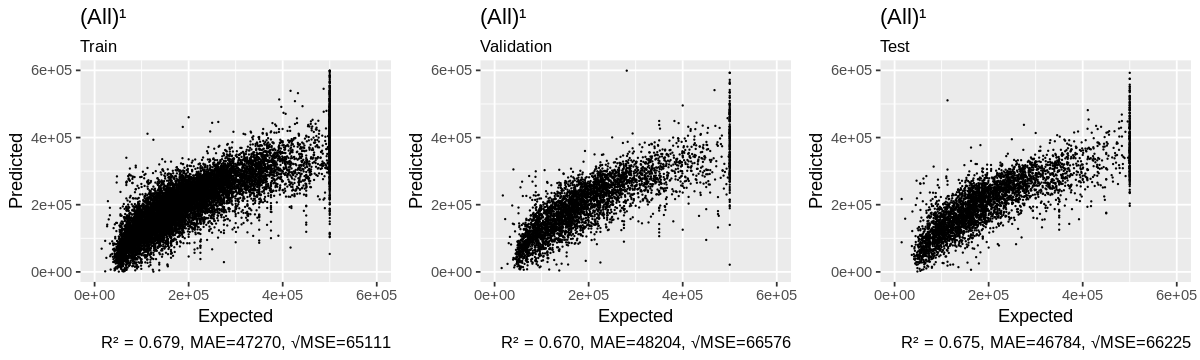

Warning message in predict.lm(regression, df):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(regression, df):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(regression, df):
“prediction from a rank-deficient fit may be misleading”Warning message:
“Removed 12 rows containing missing values (geom_point).”Warning message:
“Removed 44 rows containing missing values (geom_point).”Warning message:
“Removed 50 rows containing missing values (geom_point).”

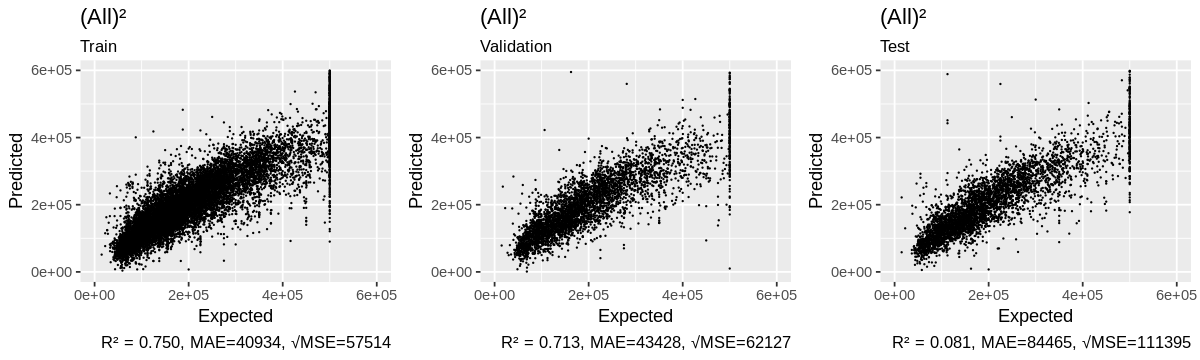

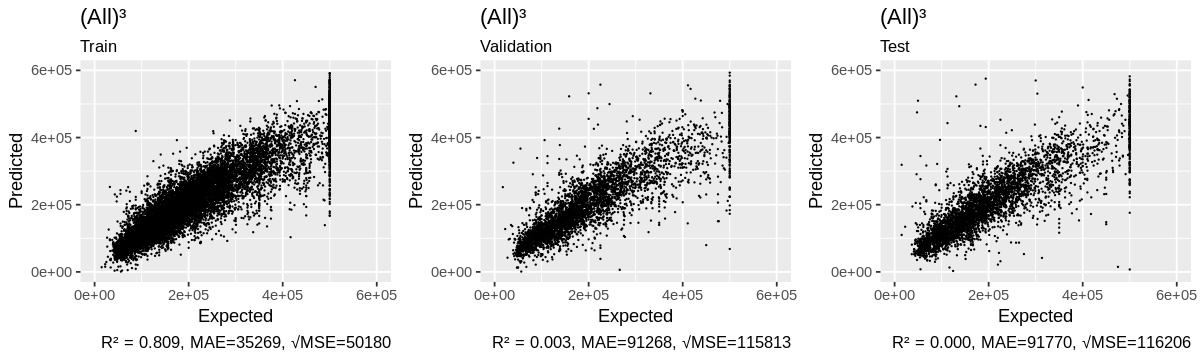

In [11]:
test.formula(
    "(All)¹",
    ocean_proximity_estimate = normalize(median_house_value ~ ocean_proximity),
    longitude = normalize('longitude'),
    latitude = normalize('latitude'),
    
    housing_median_age = normalize('housing_median_age'),
    rooms_total = normalize('total_rooms'),
    rooms_per_capita = normalize(function(df) {df$total_rooms / df$population}),
    rooms_per_household = normalize(function(df) {df$total_rooms / df$households}),
    bedrooms_total = normalize('total_bedrooms'),
    bedrooms_per_capita = normalize(function(df) {df$total_bedrooms / df$population}),
    bedrooms_per_household = normalize(function(df) {df$total_rooms / df$households}),
    population_total = normalize('population'),
    population_per_household = normalize(function(df) {df$population / df$households}),
    population_per_room = normalize(function(df) {df$population / df$total_rooms}),
    population_per_bedroom = normalize(function(df) {df$population / df$total_bedrooms}),
    households_total = normalize('households'),
    households_per_capita = normalize(function(df) {df$households / df$population}),
    median_income = normalize('median_income'),
    
    final_estimate = median_house_value ~ (ocean_proximity + ocean_proximity_estimate + longitude + latitude +  housing_median_age + rooms_total + rooms_per_capita + rooms_per_household + bedrooms_total + bedrooms_per_capita + bedrooms_per_household + population_total + population_per_household + population_per_room + population_per_bedroom + households_total + households_per_capita + median_income)
)

test.formula(
    "(All)²",
    ocean_proximity_estimate = normalize(median_house_value ~ ocean_proximity),
    longitude = normalize('longitude'),
    latitude = normalize('latitude'),
    
    housing_median_age = normalize('housing_median_age'),
    rooms_total = normalize('total_rooms'),
    rooms_per_capita = normalize(function(df) {df$total_rooms / df$population}),
    rooms_per_household = normalize(function(df) {df$total_rooms / df$households}),
    bedrooms_total = normalize('total_bedrooms'),
    bedrooms_per_capita = normalize(function(df) {df$total_bedrooms / df$population}),
    bedrooms_per_household = normalize(function(df) {df$total_rooms / df$households}),
    population_total = normalize('population'),
    population_per_household = normalize(function(df) {df$population / df$households}),
    population_per_room = normalize(function(df) {df$population / df$total_rooms}),
    population_per_bedroom = normalize(function(df) {df$population / df$total_bedrooms}),
    households_total = normalize('households'),
    households_per_capita = normalize(function(df) {df$households / df$population}),
    median_income = normalize('median_income'),
    
    final_estimate = median_house_value ~ (ocean_proximity + ocean_proximity_estimate + longitude + latitude +  housing_median_age + rooms_total + rooms_per_capita + rooms_per_household + bedrooms_total + bedrooms_per_capita + bedrooms_per_household + population_total + population_per_household + population_per_room + population_per_bedroom + households_total + households_per_capita + median_income) ^ 2
)


test.formula(
    "(All)³",
    ocean_proximity_estimate = normalize(median_house_value ~ ocean_proximity),
    longitude = normalize('longitude'),
    latitude = normalize('latitude'),
    
    housing_median_age = normalize('housing_median_age'),
    rooms_total = normalize('total_rooms'),
    rooms_per_capita = normalize(function(df) {df$total_rooms / df$population}),
    rooms_per_household = normalize(function(df) {df$total_rooms / df$households}),
    bedrooms_total = normalize('total_bedrooms'),
    bedrooms_per_capita = normalize(function(df) {df$total_bedrooms / df$population}),
    bedrooms_per_household = normalize(function(df) {df$total_rooms / df$households}),
    population_total = normalize('population'),
    population_per_household = normalize(function(df) {df$population / df$households}),
    population_per_room = normalize(function(df) {df$population / df$total_rooms}),
    population_per_bedroom = normalize(function(df) {df$population / df$total_bedrooms}),
    households_total = normalize('households'),
    households_per_capita = normalize(function(df) {df$households / df$population}),
    median_income = normalize('median_income'),
    
    final_estimate = median_house_value ~ (ocean_proximity + ocean_proximity_estimate + longitude + latitude +  housing_median_age + rooms_total + rooms_per_capita + rooms_per_household + bedrooms_total + bedrooms_per_capita + bedrooms_per_household + population_total + population_per_household + population_per_room + population_per_bedroom + households_total + households_per_capita + median_income) ^ 3
)